<a id='gather'></a>

## Gathering

# Table of Contents
- [Introduction](#intro)
- [Part I - Gathering](#gather)
- [Part II - Accessing](#access)
- [Part III - Cleaning](#clean)
- [Part VI Analyzing & Visualizing](#analyze)
- [Part V Conclusion](#conclude)
- [Acknowledgement](#acknowledge)


<a id='intro'></a>

## Introduction
The goal is to create the interesting and trustworthy analyses and visualization of the WeRateDogs Twitters.\
First, we need to combine and clean the data, by applying the wrangling data process.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from timeit import default_timer as timer
import datetime
import ast
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

- To download image_predictions.tsv programmatically

In [2]:
# get the url from Udacity Websit
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# assign location for the downloaded file
folder_name = "D:\dog_pro"

In [3]:
# # unhightlight to get and check the request status
# response = requests.get(url)
# print(response)

     The integer 200 means that the server has our requsted data

In [4]:
# # un hightlight the code to  download image_predictions.tsv programmatically 
# with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
#     file.write(response.content)

In [5]:
# check whetehr image_predictions.tsv in folder
os.listdir(folder_name)

['.ipynb_checkpoints',
 'act_report.pdf',
 'image-predictions.tsv',
 'read_me.txt',
 'time-log.txt',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb',
 'wrangle_report.pdf']

### Querry Twitter Data
 - Using the [this guide](https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/)
   to obtain the four keys
 

In [6]:
# extract the tweet_ids
TWarchive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = TWarchive.tweet_id.tolist()

In [7]:
# access the keys in a separated file
keys = pd.read_csv('D:\data_base\API-KEYS.csv')
consumer_key = keys.consumer_key.tolist()[0]
consumer_secret = keys.consumer_secret.tolist()[0]
access_token = keys.access_token.tolist()[0]
access_secret = keys.access_secret.tolist()[0]

In [8]:
# k1= 'JNz7t0OeuUAqoOKpC2IoraWCJ'
# k2 = 'xnWPi20r2NaxqjrQR6Av6GNRcV5aXIS61JTYQBezg9tL5Wnqnl'
# k3 = '826878910042247171-doA9M6arDmUEvtb74md8lRFuMLIFUpf'
# k3 = 'D6LWyq9gUamM4nBuVAeYUQ0lo7swnpEaERRS56Vq1PHbh'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [10]:
def get_tweet(tweetID,API):
    tweet = API.get_status(tweetID, tweet_mode='extended', wait_on_rate_limit = True)
    return tweet._json
    

In [11]:
json_file = 'tweet_json.txt'

In [12]:
# #this code is run to generate tweet_json.txt. Once it finised querrying the tweets,
# #it  is kept as comment , so it will not be executed again.
# with open(json_file, 'w') as file, open('time-log.txt', 'w') as time_log:
#     for ID in tweet_ids:
#         status = ''
#         start = timer()
#         try:
#             content = get_tweet(ID, api)
#             file.write(json.dumps(content) + '\n')
#             result = 'good'
#         except tweepy.TweepError:
#             result = 'TweepError'
#         end = timer()
#         time_log.write(('%s\t%s\t%s\t%s\n') % (str(datetime.datetime.now()), result, str(ID), str(end - start)))
 

In [13]:
# print out the keys of each json data
with open(json_file, encoding = 'utf-8') as f1:
    first_line = f1.readline()
    note = json.loads(first_line)
note.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [14]:
note['contributors']

In [15]:
df_list = []
with open(json_file, encoding = 'utf-8') as file:
    for line in file:
        # since each JSON data is stored in a line, we can converted them in to dictonary
        book = json.loads(line)
        df_list.append({'tweet_id': int(book['id']),
                       'retweet_count': int(book['retweet_count']),
                       'favorite_count' :int(book['favorite_count'])})


In [16]:
# turn the df_list into data frame
col = ['tweet_id','retweet_count','favorite_count']
df_json = pd.DataFrame(df_list, columns = col)

<a id='access'></a>
## Accessing

In [17]:
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')
print('json = {}\narchive = {}\nimage = {}'.format(df_json.shape[0],TWarchive.shape[0],df_image.shape[0]))

json = 2348
archive = 2356
image = 2075


In [18]:
TWarchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
TWarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
# give the name of columns that have null values
TWarchive.columns[TWarchive.isnull().any()].tolist()

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls']

 1.Issue found: 'in_reply_to_status_id', 'in_reply_to_user_id', 
    <br> 'retweeted_status_id', 'retweeted_status_user_id' 
    <br> 'retweeted_status_timestamp' and 'expanded_urls' 
    <br> we will use thos null column to get original tweets.


 2.columns sources seems to be unnecessary

In [21]:
TWarchive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

  - Since the numbers of tweet_id are equal to the number of TWarchive's row,
  <br> there are no dublicate tweet_id

  3.Issue found: The timestamp variable is string data type.<br> 
  4.Issue found: Tweet_id should be objects.<br>
  5.Issue found: rating_numerator, and rating denominator should be 
        float <br>
  6.Rating denominators are incorrect. The denominator must be 10. 


  - The rating_demoninator is supposed to have only one unique value which is 10.
  <br> Since it has eighteen unique values. This could mean that other values 10 are used
  <br> as demoninator.

In [22]:
TWarchive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

   -  The Rating denominators are incorrect. The denominator must be 10.
   <br> for example zeros would cause division zero errors

In [23]:
TWarchive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [24]:
# there is some lower cased in TWarchive name
# Extract the lower- cased name
tweet_names = TWarchive.name.unique().tolist()

def get_lowerCase(name_list):
    #return a list of lower cased string
    lower = []

    for name in name_list:
        if name.islower():
            lower.append(name)
    return  lower
lower_names = get_lowerCase(tweet_names)       

In [25]:
lower_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

- These are not attually names. They are either dogs' nick names, or the ownners' expression of their dogs.

In [26]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8718,39162
1,892177421306343426,6396,33540
2,891815181378084864,4252,25277
3,891689557279858688,8814,42534
4,891327558926688256,9596,40707
5,891087950875897856,3182,20406
6,890971913173991426,2120,11962
7,890729181411237888,19313,66188
8,890609185150312448,4346,28017
9,890240255349198849,7578,32234


In [27]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
tweet_id          2348 non-null int64
retweet_count     2348 non-null int64
favorite_count    2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [28]:
df_json.nunique()

tweet_id          2348
retweet_count     1749
favorite_count    2006
dtype: int64

In [29]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [30]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [32]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='clean'></a>
## Cleaning

In [33]:
TWarchive_clean = TWarchive.copy()
dfJson_clean = df_json.copy()
dfImage_clean = df_image.copy()

### Quality


#### 	Issue 1: There must be only original tweets
##### Define
To remove the rows taht hvae non-empty 'retweet_status_id', 
<br> 'retweeted_status_user_id’ and 'retweeted_status_timestamp'

##### Code

In [34]:
INDEX = TWarchive_clean.loc[((TWarchive_clean.retweeted_status_id.notnull())
               &(TWarchive_clean.retweeted_status_user_id.notnull())) &
                (TWarchive_clean.retweeted_status_timestamp.notnull())].index

In [35]:
TWarchive_clean.drop(INDEX , inplace = True)

##### Test

In [36]:
TWarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

- Since there are no non_emplty row with 'retweeted_status_id'
 <br> 'retweeted_status_user_id', and 'retweeted_status_timestamp'. 
 <br> we have the original tweet.

#### 	Issue 1 Continued
##### Define
To remove 'retweeted_status_id’,'retweeted_status_user_id’,'retweeted_status_timestamp'
<br> 'in_reply_to_status_id','in_reply_to_user_id', and 'expanded_urls'
<br> are unneccessary for the analysis.


##### Code

In [37]:
# give the name of columns that have null values
na_columns = TWarchive_clean.columns[TWarchive_clean.isnull().any()].tolist()

In [38]:
TWarchive_clean.drop(na_columns, axis = 1, inplace = True)

##### Test

In [39]:
sum(TWarchive_clean.isnull().any())

0

In [40]:
list(TWarchive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Issue 2: Source columns will not be used for the anlysis
##### Define
Drop column 'source'

##### Code

In [41]:
TWarchive_clean.drop('source', axis = 1, inplace = True)

##### Test

In [42]:
TWarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Issue3 : The timestamp In should be time date time
#### Issue4 : Tweet_id should be objects
##### Issue5: Rating_numerator, and rating denominator should be float
##### Define
Use pandas to convert columns value to the approriate value type.

##### Code

In [43]:
TWarchive_clean['timestamp'] = pd.to_datetime(TWarchive_clean['timestamp'])
TWarchive_clean['tweet_id'] = TWarchive_clean.astype(str)
TWarchive_clean['rating_numerator'] = TWarchive_clean.rating_numerator.astype(float)
TWarchive_clean['rating_denominator'] = TWarchive_clean.rating_denominator.astype(float)

##### Test

In [44]:
t = TWarchive_clean.timestamp.dtype
I = TWarchive_clean.tweet_id.dtype
n = TWarchive_clean.rating_numerator.dtype
d = TWarchive_clean.rating_denominator.dtype
print('timestamp type: {} \n tweet_id type : {} \n'.format(t,I)) 
print('rating_numerator type: {} \n rating_denominator type : {} \n'.format(n,d)) 


timestamp type: datetime64[ns] 
 tweet_id type : object 

rating_numerator type: float64 
 rating_denominator type : float64 



#### Issue 6: Rating_denominator should be 10
##### Define
Drop row with rating denominators whose values are not 10


##### Code

In [45]:
not10_index = TWarchive_clean.query('rating_denominator != 10').index

In [46]:
TWarchive_clean.drop(not10_index , inplace = True)

##### Test

In [47]:
TWarchive_clean.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

#### Issue 7: The name in the column ‘name’ is not capitalized

##### Define
change those names into uper-cased

#### Code

In [48]:
def capitalize_first_word(words_list):
    # To capitalize the first letter of each word in the sring list
    new_list = []
    for w in words_list:
        new_list.append(w.title())
    return new_list

In [49]:
def change_2_upper(df, colname):
    # change every lower_cased value into upper value
    lower_names = get_lowerCase(df[colname].unique().tolist())
    upper_names = capitalize_first_word(lower_names)
    # loopping process to change ever lower cased name to upper case
    for l in lower_names:
        upper_index = lower_names.index(l)
        upper_value  = upper_names[upper_index]
        df[colname].replace(l,upper_value, inplace = True)
    return df

In [50]:
TWarchive_clean = change_2_upper(TWarchive_clean, 'name')

In [51]:
def check_empty_list(L):
    if not test_list:
        print('The list is empty.')
    else:
        print('The list is not empty.')


#### Test

In [52]:
Clean_names = TWarchive_clean['name'].unique().tolist()
# get the lower cased word in the colmnum
test_list = get_lowerCase(Clean_names)
# check whether the list is empty:
check_empty_list(test_list)

The list is empty.


#### Issue 8 :  dog_breed  name in df_imageshould be consistently upper cased

##### Define
Repeat the steps in issues 7

##### Code

In [53]:
dfImage_clean = change_2_upper(dfImage_clean, 'p1')
dfImage_clean = change_2_upper(dfImage_clean, 'p2')
dfImage_clean = change_2_upper(dfImage_clean, 'p3')

##### Test

In [54]:
image1= get_lowerCase(dfImage_clean ['p1'].unique().tolist())
image2= get_lowerCase(dfImage_clean ['p2'].unique().tolist())
image3= get_lowerCase(dfImage_clean ['p3'].unique().tolist())
check_empty_list(image1)
check_empty_list(image2)
check_empty_list(image3)

The list is empty.
The list is empty.
The list is empty.


- Every dogbreed name in the dfImage_clean is capitalized.

#### Issue 9 :  Tweet_id in df_image should be objects:
##### Define:
Convert tweet_id to object

##### Code

In [55]:
dfImage_clean['tweet_id'] = dfImage_clean.tweet_id.astype(str)

##### Test

In [56]:
i = dfImage_clean.tweet_id.dtype
print('tweet_id type: {}'.format(i))

tweet_id type: object


#### Issue 10 :  Tweet_id in df_json should be objects:
##### Define:
Repeat the steps in issue 10

##### Code

In [57]:
dfJson_clean['tweet_id'] = dfJson_clean.tweet_id.astype(str)

##### Test

In [58]:
i = dfJson_clean.tweet_id.dtype
print('tweet_id type: {}'.format(i))

tweet_id type: object


### Tidiness

#### Issue 1:  In TWarchive, doggo, flooer, pupper, puppo should be in one columns

##### Define
Put them all in under columns called stage

##### Code

In [59]:
TWarchive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None


In [60]:
ID= ['tweet_id','timestamp','text','rating_numerator','rating_denominator', 'name']
TWarchive_clean = pd.melt(TWarchive_clean, id_vars = ID, var_name ='stage_name', value_name = 'stage')
TWarchive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage_name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,doggo,None


- Drop the column stage_name

In [61]:
TWarchive_clean.drop(['stage_name'], axis = 1, inplace = True)

##### Test

In [62]:
TWarchive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None


#### Issue 2:  df_json should be part of TWarchive table

##### Define
Merge dfJson_clean with TWarchive based on their tweet ID


#### Code

In [63]:
left = TWarchive_clean
right = dfJson_clean
TWarchive_clean = pd.merge(left, right, on='tweet_id', how='inner')

##### Test

In [64]:
TWarchive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1105,833479644947025920,2017-02-20 00:53:27,This is Poppy. She just arrived. 13/10 would s...,13.0,10.0,Poppy,None,2315,16067
2805,761672994376806400,2016-08-05 21:19:27,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,10.0,10.0,None,None,32841,54244
6324,677700003327029250,2015-12-18 04:00:46,This is Ralph. He's an interpretive dancer. 10...,10.0,10.0,Ralph,None,1594,3642


#### Issue 2:  df_json should be part of TWarchive table

##### Define
Merge dfImage_clean with TWarchive based on their tweet ID

##### Code

In [65]:
left = TWarchive_clean
right = dfImage_clean
TWarchive_clean = pd.merge(left, right, on='tweet_id', how='inner')

##### Test

In [66]:
TWarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7903
Data columns (total 20 columns):
tweet_id              7904 non-null object
timestamp             7904 non-null datetime64[ns]
text                  7904 non-null object
rating_numerator      7904 non-null float64
rating_denominator    7904 non-null float64
name                  7904 non-null object
stage                 7904 non-null object
retweet_count         7904 non-null int64
favorite_count        7904 non-null int64
jpg_url               7904 non-null object
img_num               7904 non-null int64
p1                    7904 non-null object
p1_conf               7904 non-null float64
p1_dog                7904 non-null bool
p2                    7904 non-null object
p2_conf               7904 non-null float64
p2_dog                7904 non-null bool
p3                    7904 non-null object
p3_conf               7904 non-null float64
p3_dog                7904 non-null bool
dtypes: bool(3), datetime64[n

- Check if there are any tweet with no image

In [67]:
sum(TWarchive_clean.isnull().any())

0

- Storing TWarchive_clean

In [68]:
TWarchive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analyze'></a>

## Analyzing & Visualizing

In [69]:
df = pd.read_csv('twitter_archive_master.csv',encoding = "ISO-8859-1")

In [70]:
df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8718,39162,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False
1,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8718,39162,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False


- Let add a rating ration into the data frame

In [71]:
ratio = df.rating_numerator/df.rating_denominator
colID = df.columns.get_loc('rating_denominator') + 1
df.insert(loc = colID, column = 'rate_ratio', value = ratio)
df.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,rate_ratio,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
3250,738166403467907072,2016-06-02 00:32:39,This is Axel. He's a professional leaf catcher...,12.0,10.0,1.2,Axel,None,3787,9508,...,2,Keeshond,0.878886,True,Norwegian_elkhound,0.086659,True,Malamute,0.021280,True
231,879492040517615616,2017-06-27 00:10:17,This is Bailey. He thinks you should measure e...,12.0,10.0,1.2,Bailey,None,3261,23610,...,1,German_short-haired_pointer,0.479896,True,Vizsla,0.124353,True,Bath_Towel,0.073320,False
5174,684177701129875456,2016-01-05 01:00:50,This is Kulet. She's very proud of the flower ...,10.0,10.0,1.0,Kulet,None,753,2179,...,1,Chow,0.334783,True,German_shepherd,0.162647,True,Golden_Retriever,0.138612,True


1) Which dog stage is most popular?

In [72]:
def groupby2df(g, colname):
    # convert a groupby object into data frame
    A = pd.DataFrame({colname : g}).reset_index()
    return A

In [73]:
def bar_chart(dataframe, color_list = ['blue']):
    # plot the bar chart of dataframe
    ax = dataframe.plot.bar(color = color_list,legend=False)
    xindex = dataframe.iloc[:,0].unique().tolist()
    x = list(dataframe)[0]
    y = list(dataframe)[1]
    t = y.capitalize() + '_Plot'
    ax.set_xticklabels(xindex)
    ax.set(title = t,xlabel = x , ylabel = y)

In [74]:
favorite_count = df.groupby(['stage'])['favorite_count'].mean()
stage_favorite_mean = groupby2df(favorite_count, 'favorite_mean')
stage_favorite_mean

,stage,favorite_mean
0,None,8816.652695
1,doggo,18738.283784
2,floofer,13538.750000
3,pupper,7426.783019
4,puppo,23477.695652


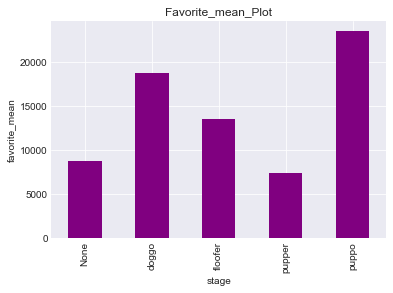

In [75]:
bar_chart(stage_favorite_mean, ['purple'])

In [76]:
stage_ratio_mean = groupby2df(df.groupby(['stage'])['rate_ratio'].mean(), 'ratio_mean')
stage_ratio_mean

,stage,ratio_mean
0,None,1.172347
1,doggo,1.178378
2,floofer,1.187500
3,pupper,1.072642
4,puppo,1.204348


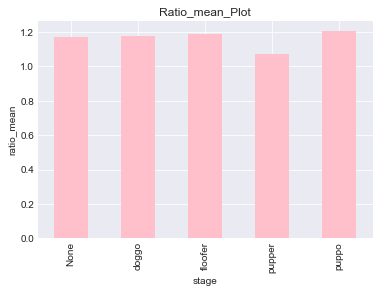

In [77]:
bar_chart(stage_ratio_mean, ['pink'])

In [78]:
retweet_mean = df.groupby(['stage'])['retweet_count'].mean()
stage_retweet_mean = groupby2df(retweet_mean,'retweet_count_mean')
stage_retweet_mean

,stage,retweet_count_mean
0,None,2704.759062
1,doggo,6765.364865
2,floofer,4696.250000
3,pupper,2418.561321
4,puppo,7092.304348


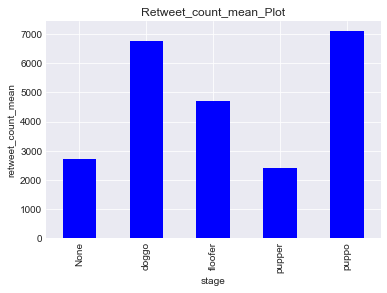

In [79]:
bar_chart(stage_retweet_mean)

- It seems that the stage 'puppo' has the highest average values, in all the categoreries:
    <br> favorite, ratio score, retweet
- Next we shall investigate the relationship bewtween retweet_count, and favoriabe, with respect to dog 'name'.

2) What is realtionship between retweet_count and favorite count?

In [80]:
name_tweet = groupby2df(df.groupby(['name'])['retweet_count'].mean(), 'retweet_mean')
name_fav   = groupby2df(df.groupby(['name'])['favorite_count'].mean(), 'favorite_mean')
tweet_fav = pd.merge(name_tweet,name_fav, on = 'name', how = 'inner')


In [81]:
tweet_fav.head(2)

,name,retweet_mean,favorite_mean
0,A,1021.092593,2961.592593
1,Abby,1356.500000,4899.000000


Text(0,0.5,'favorite_count_mean')

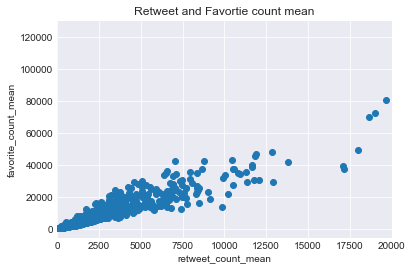

In [82]:
plt.scatter(tweet_fav.retweet_mean,tweet_fav.favorite_mean)
plt.title('Retweet and Favortie count mean')
plt.xlim(0,20000)
plt.xlabel('retweet_count_mean')
plt.ylabel('favorite_count_mean')

- The scatter plot suggests a positive correlation between average and Favorite count
 <br> with respect to dog names.

- We calculate the correlation coefficient to confirm this relationship

In [83]:
c = tweet_fav.retweet_mean.corr(tweet_fav.favorite_mean)
print('the correlation coefficent = {}'.format(c))

the correlation coefficent = 0.9285103721496415


  - The correlation coefeeicnent is close to 1. This suggests that average retweet is positively correlated to
  <br> to average favorite_count, with respect to the dog name. 
  - This may imply that the more people retweet , the more favortie they get.
  - Then we shall investigate the effectiveness of the picture predition algorithm,
  <br> by comparing the accuracy of all three predicitons.

3) In which trial, the algorithm have the most accurate prediction?

In [84]:
trail1 = (df.query('p1_dog == True').count())[0]/df.p1_dog.count()
trail2 = (df.query('p2_dog == True').count())[0]/df.p2_dog.count()
trail3 = (df.query('p3_dog == True').count())[0]/df.p3_dog.count()
print('trail1 = {}'.format(trail1))
print('trail2 = {}'.format(trail2))
print('trail3 = {}'.format(trail3))

trail1 = 0.7398785425101214
trail2 = 0.7484817813765182
trail3 = 0.7241902834008097


In [85]:
print('average accuracy percentage = {}'.format((trail1 + trail2 + trail3)/3))

average accuracy percentage = 0.7375168690958165


 - Perhaps, second trial has the highest accuratecy percentages. However all trails have approximately equal 
 <br> accuracy percentage, around 73 %

<a id='conclude'></a>

## Conclusion

 Probably the dog growth 'puppo'  is the most favorite. It has the most ratio score, tweet count, and favorite counts on average, compared to the other stage. With respect to dog 'name', there is a positive correlation between the average tweet count and favorite counts. As the numbers of tweet increases, so do the favorite counts. 
  <br>  We expect the accuracy percentage increase for each trail. The average accuracy percentage of the algorithm is about seventy - three percents. <br> The accuracy slightly increases in each trial. Perhaps more data can be
<br> collected to test the effectiveness of the algorithm.

<a id='acknowledge'></a>
## Acknowledgement

- Thank you Udacity Project Reviewers for your valuable advices